<a href="https://colab.research.google.com/github/jrigottiITBA/dm2025a/blob/main/src/CazaTalentos/CazaTalentos_eleccion_Rigotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cazatalentos
## buscando a  “La verdadera mejor encestadora”

## 1.Introduccion
Este notebook analiza de forma didáctica la razón por la que se produce el overfitting.

Ver los cinco minutos de este video muy relacionado con lo que veremos
[Veritasium El Éxito ¿es Suerte o Trabajo Duro?](https://storage.googleapis.com/open-courses/austral2025-af91/labo1r/veritasium_success_paradox.html)

### 1.1 Motivacion

El siguiente desafío busca introducir el problema fundamental de la Ciencia de Datos que es el overfitting desde un ángulo distinto,  presentando los fenómenos del efecto del tamaño de la muestra,
<br> el conocido problema de las múltiples comparaciones  y “la maldición del ganador”.
<br>
<br> Aunque anecdóticametne está basado en algo deportivo, se extiende fácilmente  a :
*  la efectividad de acciones de marketing
*  el testeo de medicamentos
*  experimentos ciéntíficos https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1182327/
*  la comparación de modelos predictivos
*  la elección del mejor corte en un nodo de un árbol de decisión, etc

### 1.2 Generalidades
Vari@s cazatalent@s de la gran ciudad van recorriendo pueblos en búsqueda de las mejores jugadoras de basket para tiros libres en la Liga Femenina de Basket.
<br>El procedimiento recomendado es el siguiente : un@ cazatalentos llega a un pueblo y va a la única cancha de basket del lugar donde la están esperando las adolescentes interesadas, las hace tirar tiros libres y elige a la mejor jugadora.
<br>Posteriormente a la elección del mejor jugadora, si le parece a la entrenadora de la gran ciudad, se llevará a la jugadora a que demuestre que tan buena es.

<br>A las jugadoras los podemos equiparar con modelos predictivos.


### 2 Definición del Problema

¿Qué metodología de las que se plantearán es la que propone a la jugadora con mayor probabilidad de superar el umbral del 80% de aciertos en la nueva prueba que se hará en la gran ciudad?
<br> Cada jugadora posee un “índice de enceste”, la cazatalentos no tiene forma de conocerlos; lo único que puede hacer la cazatalentos es hacer que las jugadoras hagan tiros libres, y medir los aciertos y no aciertos.

### 2.1  Caso fallido, una jugadora se quiere pasar de lista ...

La cazatalentos llega a una pequeña localidad a la que le han dicho que hay dos adolescentes cuyas habilidades debe testear.
<br> Una es super talentosa se llama Diana Taurasi  https://en.wikipedia.org/wiki/Diana_Taurasi, nosotros sabemos que tiene un “índice de enceste” del 0.85, es decir cada vez que hace un tiro libre su probabilidad de encestar es del 85%.   Si hace 100 tiros libres, en promedio encesta 85 veces,  a veces puede ser más, a veces menos, pero en promedio encesta 85 de 100.
<br> La otra es un auténtico desastre, a quien llamaremos  Miss X, y su índice de enceste es de 0.10.  Esto quiere decir que si hace 100  tiros libres, en promedio encesta 10.
<br> La cazatalentos NO tiene forma de conocer los valores de 0.85 y 0.10, solo puede hacerlas tirar y contar aciertos.

<br>La cazatalentos llega al gimnasio,  y solo se encuentra Diana, con lo cual le indica que comience a tirar.  Al tiro 10, Diana lleva 8 encestes y 2 no-enceste.
<br>En ese momento, llega con un andar cansino Miss X y las interrumpe :  ¿cuánto va Diana ? La cazatalentos le responde  8 de 10.  Miss X solicita permiso para tirar, tira una sola vez y acierta.
<br>Ahí mismo dice : “paren las rotativas, yo soy la clara ganadora de este torneo,  mi indice de acierto es del  100% y el de Diana es del 80% ,  la matemática es clara”.
<br>La cazatalentos monta en cólera y le dice :  pues usted joven solo ha realizado un tiro, ¿Si lo hubiera errado, aceptaría decir entonces que su indice de acierto es del 0%? Ciertamente no.
<br>Pues ahora, usted deberá seguir tirando hasta completar sus 10 tiros libres, y recién ahí compararé.


### 2.2 Segundo Caso

La cazatalentos tiene el siguiente algoritmo, hace que Diana Taurasi y Miss X hagan 10 tiros libres cada una, y elige a la ganadora de esos 10 tiros libres.
¿Garantiza este método que por lo menos el 99% de las veces elige a Diana Taurasi?

<br>¿La desastrosa Miss X puede llegar a encestar los 10 tiros libres?  <br>Efectivamente sí existe esa posibilidad, pero con una muy baja probabilidad, la probabilidad es de 0.10 ^10  =  1e-10
<br>El símbolo de  ^  significa  "elevado a la potencia de"
<br>
<br>¿Cual es la probabilidad que Miss X tire una sola vez y acierte este tiro? <br>Simplemente 0.1 , una en diez, con lo cual ha tenido mucha suerte en su primer tiro, pero no la va a poder mantener !

<br>¿La adolescente Diana Taurasi puede llegar a encestar los 10 tiros libres?  Efectivamente, su probabilidad es  0.85 ^10 = 0.1968744

En el lenguaje R la instrucción  runif(10)  genera un vector con 10 números aleatorios con distribución uniforme en el intervalo [0,1], por ejemplo

In [ ]:
runif(10)

Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con la ganadora.

In [ ]:
missx_ganadora <- 0

for( i  in 1:10000 )
{
  aciertos_taurasi <- sum( runif(10) < 0.85 )
  aciertos_missx <- sum( runif(10) < 0.10 )

  if( missx_ganadora > aciertos_missx )  missx_ganadora <- missx_ganadora +1
}

cat( "Miss X gano un total de : ", missx_ganadora )

Lo que da la cantidad de 0,  o sea que en 10000 veces, siempre ganó Diana Taurasi, con lo cual la estrategia de quedarse con el mejor de 10 tiros ha funcionado, para este obvio caso donde hay apenas dos jugadoras y hay una diferencia abismal entre ellas.

En este caso NO aparece el overfitting por ningún lado

### 2.3  Aparece el Overfitting

El cazatalentos llega ahora a un pueblo donde hay 100 jugadores los que son mucho más parejos entre sí desde el punto de vista del ratio de enceste.

Hay un jugador, que llamaremos jugador 1 que tiene un “índice de enceste” de  0.70
Los 99 jugadores restantes que llamaremos “el pelotón”  tienen los índices de enceste  { 0.501, 0.0502, 0.503, …, 0.599  }
Es decir el jugador 1 tiene 0.70 y el mejor jugador del pelotón tiene 0.599,  hay un poco más de 0.10 de diferencia.  La diferencia de 0.10 es significativa en basket.

¿Qué sucede con el algoritmo del cazatalentos de hacer tirar 10 tiros libres a cada uno de los jugadores y elegir al que más encestes logró ?


In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# haciendo qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
taurasi    <- 0.7
peloton    <- ( 501:599 ) / 1000
jugadoras  <- c( taurasi, peloton )





# hago que las 100 jugadoras tiren 10 veces cada una
mapply( ftirar, jugadoras, 10 )

primera_ganadora  <- 0

for( i in 1:10000 ){  # diez mil experimentos

  vaciertos  <- mapply( ftirar, jugadoras, 10 )  # 10 tiros libres cada jugadora

  mejor  <- which.max( vaciertos )
  if( mejor == 1 )  primera_ganadora  <- primera_ganadora + 1
}

cat("\n")
cat( "En los diez mil experimentos, se detecto correctamente a la mejor jugadora la cantidad de veces:", primera_ganadora )


Aquí ya pasa algo asombroso, el overfitting en todo su esplendor.
Si hago tirar 10 tiros libres a cada uno de las 100 jugadoras, apenas 1450 veces de las 10000 este método  devuelve a la verdadera mejor, que es la jugadora con un índice de enceste de 0.70

Intuitivamente, lo que está sucediendo es que la inmensa mayoría de las veces, una de las 99 jugadoras del pelotón tiene mucha suerte y supera a la jugadora de 0.70, con lo cual se elige a una del pelotón y no a la verdadera mejor !  
<br>El tener 99 jugadoras en el pelotón hace que al ser tantas hay varias que tienen mala suerte, pero también hay varias con muy buena suerte, y la que tuvo más suerte supera a la verdadera mejor !


### 2.4 Nueva ronda

Ahora pasemos a ver aún algo más notable.
Tenemos a nuestra jugadora de 0.70, y a las 99 jugadoras del pelotón.
1.  Las hacemos tirar a cada una 10 tiros libres, y elegimos a la ganadora registrando cuántos aciertos tuvo
2.  solo a esa ganadora la hacemos tirar una nueva ronda de 10 tiros libres
3.  finalmente comparamos estos nuevos aciertos con los originales.


In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# haciendo qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
taurasi <-  0.7
peloton    <-  ( 501:599 ) / 1000
jugadoras  <-  c( taurasi, peloton )


cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")

for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 10 )  # cada jugadora tira 10 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 10 )

  cat( aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}

Lo que se observa en este caso es “La maldición del ganador”,
<br>la performance que la jugadora que logró más aciertos en la competencia general luego NO LA PUEDE MANTENER,
<br>en todos los casos vemos que en la nueva ronda de diez tiene menos aciertos que en la primera ronda de diez.
<br>La primera ronda  la jugadora que resultó ganadora fue debido a la suerte, y esa suerte ya no la acompaña para la segunda ronda de 10 tiros libres.

Relacionado con las competencias Kaggle, una forma de pensar esto es  "¿Cómo le va a ir al mejor modelo del Public Leaderboard en el Private?" ,  esta es la razón por la que los puntajes que vemos en el Private son inferiores al Public.
La primer ronda puede verse como quedarnos con el mejor modelo del Public Leaderboard, la nueva ronda es como le va a ese modelo en el Private Leaderboard.
<br>Elegir el mejor modelo del Public, suele ser una pésima estrategia.

### El overfitting en su plenitud

¿Cuándo es más extremo el efecto de “La maldición del ganador” ?
<br>Supongamos por un momento que ahora, en otro pueblo,  tenemos 100 jugadoras nuevas, todas con un “índice de enceste” de 0.70 ;  recordar que ese valor jamás es conocido por la cazatalentos.

<br>Ahora nos ponemos más estrictos, y las hacemos tirar 100 veces a cada una, elegimos a la ganadora, y solo a esa ganadora la hacemos tirar 100 nuevos tiros libres.
<br> Podemos pensarlo como que la cazatalentos se lleva a la mejor jugadora a la gran ciudad, le habla maravillas de ella a la entrenadora, y la entrenadora dice “probémosla a ver si es tan buena como decís, que haga 100 tiros libres aquí y ahora”

In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
jugadoras  <- rep( 0.7, 100 )




cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")
for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugadora tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 100 )

  cat( aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}

Nuevamente vemos, que el puntaje alcanzado por la mejor jugadora cuando compitió contra las otras 99,  NO ES VUELTO A ALCANZAR  en la nueva ronda de 100 tiros libres que hace esa jugadora.
<br>Este efecto es exactamente el mismo que vemos cuando alguien se empecina en lograr en el Leaderboard Público el mayor puntaje de la clase,  le va muy bien en el Público, pero se derrumba catastróficamente en el Privado.
<br>Decimos que  “overfitió / sobreajustó el Leaderboard Publico”.

### 2.5 medida de la diferencia

Ahora nos preguntamos, en este caso, en promedio, cuanto más aciertos tiene la ganadora (debido a la suerte)  en la primera ronda  con respecto a la segunda ?


In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
jugadoras  <- rep( 0.7, 100 )




suma_diferencias <- 0

for( i in 1:10000 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugador tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[mejor], 100 )

  suma_diferencias  <- suma_diferencias +  (aciertos_torneo - aciertos_segunda )
}


cat( "Diferencia promedio:",  suma_diferencias / 10000 )


Exactamente este mismo efecto se da en el marketing digital.  Si en un A/B testing se prueban cien alternativas y se elige a la que tiene más efectividad, se observará que en un nuevo experimento disminuirá el rendimiento de esa alternativa.

También sucede si se prueban muchos medicamentos al mismo tiempo,   el que resulte más efectivo disminuirá su efectividad en la nueva prueba.

Este problema es llamado “El problema de las múltiples comparaciones”

### 2.6 una sola jugadora MUY buena

Sexto caso,  ¿cuándo se atenúa/desaparece  el overfitting?
Supongamos 99 jugadoras con un índice de enceste de 0.60   y  ahora sumamos a la adolescente Diana Taurasi con su superlativo índice de enceste del 0.85
Los hacemos tirar a todas 100 tiros libres, llevamos a la ganadora a la gran ciudad, y allí le contamos a la entrenadora de nuestra ganadora Diana Taurasi.

In [ ]:


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino las jugadoras
taurasi    <- 0.85
peloton   <- rep( 0.6, 99 )  # jugadoras identicas
jugadoras <- c( taurasi, peloton )



cat( "Aciertos Ganadora", "\t", "Nueva Ronda", "\n")

for( i in 1:10 ){
  vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugadora tira 100 tiros libres
  mejor  <- which.max( vaciertos )
  aciertos_torneo  <- vaciertos[ mejor ]

  aciertos_segunda  <- ftirar( jugadoras[ mejor ], 100 )

  cat(aciertos_torneo, "\t\t\t", aciertos_segunda, "\n" )
}



En este caso observamos dos cosas, en primer lugar SIEMPRE la ganadora del torneo fue Diana Taurasi, y en segundo  cuando tuvo que mostrar en la ciudad su performance, fue la misma que en el primer torneo.  
<br>Es tan buena Taurasi que le ganó a la que tuvo más suerte del pelotón, el efecto suerte no está afectando a Taurasi porque está sola, y gana por su superioridad, no por la suerte.

### 2.7 Efectos del tamaño de la ronda

La cazatalentos llega ahora a un pueblo donde hay 100 jugadoras las que son mucho más parejas entre sí desde el punto de vista del ratio de enceste.
Hay un jugadora, que llamaremos jugadora 1 que tiene un “índice de enceste” de  0.70 ,  es una jugadora buena pero dista mucho de ser Diana Taurasi, jamás estará en el "WNBA Hall of Fame".

Las 99 jugadoras restantes que llamaremos “el pelotón”  tienen los índices de enceste  { 0.501, 0.0502, 0.503, …, 0.599  }  Es decir la jugadora 1 tiene 0.70 y la mejor jugadora del pelotón tiene 0.599,  o sea hay un poco más de 0.10 de diferencia.  La diferencia de 0.10 es significativa en basket.

¿Cuántos tiros libres debe la cazatalentos pedirles que haga cada jugadora para que  si elige a la mejor jugadora tiene la certeza de llevarse a “la verdadero mejor” el 99% de los casos ?


In [ ]:
# intencionalmente la mejor jugadora va al final de la lista de jugadoras
# porque la funcion which.max() de R hace trampa
# si hay un empate ( dos máximos) se queda con la que esta primera en el vector


set.seed( 102191 )

# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

ftirar  <- function( prob, qty ){
  return( sum( runif(qty) < prob ) )
}


# defino los jugadoras
taurasi    <- 0.7
peloton    <- ( 501:599 ) / 1000
jugadoras  <- c( peloton, taurasi) # intencionalmente la mejor esta al final


for( tiros_libres in c(10, 20, 50, 100, 200, 300, 400, 415, 500, 600, 700, 1000 ) ){

  ultima_ganadora <- 0

  for( i in 1:10000 ) { # diez mil experimentos

    vaciertos  <- mapply( ftirar, jugadoras, tiros_libres )
    mejor  <- which.max( vaciertos )

    if( mejor == 100 )  ultima_ganadora  <- ultima_ganadora + 1
  }

  cat( tiros_libres, "\t", ultima_ganadora/10000, "\n" )
}



Haciendo tirar 415 tiros libres a cada una de los 100 jugadoras,
<br> y quedándose con la ganadora de ese torneo,
<br> en el 99.10%   ( 0.9910 )  de los casos se está segura que esa es "la verdadera mejor".


## 3 Conclusiones

El overfitting aparece cuando se comparan muchas jugadoras (modelos predictivos)  muy parecidas entre sí.  
<br> En el modelado predictivo es la situación más común que se tengan modelos con similar poder predictivo ya que generalmente solo difieren apenas en valores de los hiperparámetros o algunas columnas nuevas con feature engineering.

Las jugadoras no son determinísticas, sino probabilísticas, con lo cual al comparar muchas parecidas la ganadora es quien además de su talento tuvo más suerte en ese torneo.  La jugadora ganadora ganó por mera suerte, y  NO puede sostener esa suerte en un nuevo torneo, por lo que el puntaje del primer torneo es mentiroso, no se sostiene en el nuevo torneo.

El overfitting se atenúa o puede llegar a desaparecer del todo, si en el torneo hay una jugadora ampliamente superior al resto. Esa jugadora SI mantiene su performance de un torneo al otro, ya que su puntaje en el primer torneo fue alto porque es realmente buena, porque no es el máximo de muchos parecidas a ella.

La forma de combatir el overfitting es hacer torneos de muchos tiros libres.
<br>Para estimar que tan buena es la jugadora ganadora de un torneo, hay que hacerla tirar nuevamente tiros libres.
<br>El secreto está en hacer más de un torneo.


## 4 Desafio Cazatalentos Ordenamiento

### 4.1 Enunciado

Se reúne la entrenadora  en la gran ciudad con algunas cazatalentos que visitaron regiones distintas.

Entrenadora:  Bienvenidas a todas, veo que cada una de ustedes ha traído la estadística de su candidata. Sin embargo, yo debo ordenarlas de mejor a peor, y no me alcanza con que dos de ustedes me digan que que sus candidatas encestaron 80/100, necesito que me relaten exactamente el procedimiento que han seguido para elegir a la mejor jugadora.

Cazatalentos 1:  Discúlpeme entrenadora, si dos de nosotras le presentamos casos que en distintos pueblos han encestado exactamente 80 de 100, probabilisticamente esas adolescentes son equivalentes. Es cierto que luego aquí en la gran ciudad el dia de la prueba una podrá encestar 77 de 100, la otra 83,  pero eso es la parte natural del random, ya sabemos que la distribución es binomial.  Ambas son equivalentes, no importa que pasó con el resto de las jugadoras de su pueblo.

Entrenadora: Estimada “Cazatalentos 1”  tú estas equivocada, no consideras El Problema de las Multiples Comparaciones; elegir cuales de esas adolescentes vendrán a la gran ciudad a ser evaluadas es mi decisión. Comienza tú contando detalladamente el proceso que has seguido.
4



**Cazatalentos 1**: Llegué a la localidad habían 100 adolescentes en el gimnasio, hice tirar a cada una 100 tiros, solo una obtuvo 80 aciertos, luego un par 79, otro par 78, y así descendían. La que logró 80 aciertos es mi candidata.


**Cazatalentos 2:** Llegué a una pequeña ciudad y habían 200 adolescentes en el gimnasio, hice tirar a cada una 100 tiros, solo una obtuvo 80 aciertos, seis 79,  cinco 78, y así descendían. La que logró 80 aciertos es mi candidata.

**Cazatalentos 3:** Yo poseo 25 años de experiencia como cazatalentos y tengo muy buena intuición  para detectar el talento. Llegué a un pueblo donde habían 100 adolescentes, me senté en las gradas del gimnasio y las observé detenidamente mientras precalentaban sin tirar al aro.  A los 10 minutos, me paro, y señalo a una de ellas y le digo :  'tú, la número 13, a tirar 100 tiros; el resto gracias por haber venido pero se pueden ir cada una a su casa”. Y ahí al tirar esos 100 tiros logró 80 aciertos y esa es mi candidata.

**Cazatalentos 4:** Llegué a minúsculo pueblo con un aro reglamentario en la pared de una escuela, habían solamente 2 adolescentes, hice tirar a cada una 100 tiros, una obtuvo 80 y la otra 75.

**Cazatalentos 5:** Le dice a la entrenadora : “fui a una localidad de 500 habitantes, había una sola adolescente interesada, la hice tirar 100 tiros libres, y encestó 80,  tengo una filmación con mi celular de los 100 tiros, sin edición ni cortes”
En realidad, esa adolescente es la sobrina de la cazatalentos, la hizo tirar 10 rondas de 100 tiros cada una, grabó todas, pero tramposamente solo trae la grabación de la mejor ronda a la entrenadora.
Los resultados obtenidos por su sobrina son


| ronda | Tiros | Encestes |
| ---: | ---: | ---: |
| 1 | 100 | 68 |
| 2 | 100 | 74 |
| 3 | 100 | 78 |
| 4 | 100 | 70 |
| 5 | 100 | 68 |
| 6 | 100 | 63 |
| 7 | 100 | 80 |
| 8 | 100 | 68 |
| 9 | 100 | 67 |
| 10 | 100 | 65 |


(esta deshonestidad de la Cazatalentos 5 no debería parecerle extraña ni causarle gracia, es exactamente lo mismo que elegir como submit final el que le fue mejor en el Public Leaderboard,  algo muy común entre l@s alumn@s ...)
<br>Por una persona espía en el pueblo, la entrenadora está al tanto de lo ocurrido y conoce la tabla anterior, usará dicha información para tomar la decisión, aunque no le dirá nada, por esta vez, a la cazatalentos.

### 4.2 Desafio

Podemos suponer que la supertalentosa Diana Taurasi con su “índice de enceste” del 0.85 es superior a todas las jugadoras evaluadas en los pueblos por las cazatalentos.

Desafío : ¿Si usted fuera la entrenadora, como ordena el valor esperado de encestes en una ronda de 100 tiros libres  a cada una de las candidatas propuestas por las cinco cazatalentos ?


donde   Ci  < Cj   sii   prob(  #Encestes Ci  <  #Encestes Cj    | 100 tiros cada uno )  >  0.5
es decir que, haciendo 100 tiros libres,  más de la mitad de las veces,  Ci va a lograr menos encestes que Cj

La entrenadora de la gran ciudad NO quiere traer a la elegida de cada cazatalentos y hacerlas tirar 100 tiros delante de ella para constatar cual logra más encestes en esa ronda. Ella quiere, con la información que le brindó cada cazatalentos sobre el procedimiento y los resultados, elegir la mejor encestadora.


In [ ]:
bado

### 4.3  Reglas del Desafio


*  La fecha de finalización del desafío es el sabado 02 de agosto a las 19:00
Usted podrá trabajar en forma individual o formando grupo de dos personas.
*  Entrega
      * la entrega se realiza con un solo mensaje en Zulip canal #CazaTalentos
         * Ordenamiento,  por ejemplo     C3 <  C5 <  C1 < C4 < C2
         * Explicacion
      * Si necesitará apoyarse en scripts para alguna de las comparaciones
          * link a carpeta en GitHub
      * Podrá enviar varios mensajes, el único que tendrá valor será el último

*  Recompensa:
     * Todos los integrantes de todos los grupos que logren un ordenamiento perfecto sumarán a su nota final el valor de 1.0 ,  siempre la nota máxima posible de toda la asignatura será de 10.0
     * Un ordenamiento que no sea el correcto, suma 0 puntos.
*  Será muy valioso el intercambio de ideas en Zulip channel  #CazaTalentos  topic  Intercambio de Ideas, este desafío suele ser muy polémico.
*  La participación en este desafío es opcional.


Eleccion



### 4.4 Justificacion

Cada Cazatalentos presenta a la entrenadora una candidata elegida usando los siguientes parametros:

jugadora_1
m = 100
n = 100
p = 0.8

jugadora_2
m = 200
n = 100
p = 0.8

jugadora_3
m = 1
n = 100
p = 0.8

jugadora_4
m = 2
n = 100
p = 0.8

jugadora_5
m = 1
n = 1000 (10 rondas de 100)
p = 0.701 (media de todas las rondas)


p: indice de aciertos que la jugadora encestó en una muestra de tiros (n).
La jugadora_1 tiene un índice de acierto de 0.8, lo que significa que encestó 80 de 100 tiros. Este valor es una estimación puntual de la verdadera probabilidad de encestar.

n: cantidad de tiros al aro.
Es el tamaño de la muestra de tiros que se usó para calcular el índice de acierto.

m: cantidad de jugadoras en la muestra.
Indica cuántas jugadoras se evaluaron en total para encontrar a esa jugadora en particular. Es una valor muy importante que nos da una pista sobre el sesgo de la selección.

El hecho de que las cazatalentos C1 y C2 hayan evaluado a 100 y 200 jugadoras respectivamente y hayan seleccionado a la mejor (la que tuvo el índice de acierto más alto) introduce un sesgo de selección.
Esto significa que el índice de acierto observado para esas jugadoras es probablemente una sobreestimación de su verdadera habilidad, especialmente si la muestra de tiros (n) es pequeña y la muestra de jugadoras (m) es grande.


En el ejemplo "Overfitting en su plenitud" vimos que la jugadora que obtuvo el mejor p en el primer torneo, no puede mantenerlo en el segundo torneo (para el caso que todas las jugadoras tengan similares aptitudes, no fue asi en el caso de Diana Taurasi)



Ajuste el script para simular diez mil torneos de las jugadoras propuestas por C1, C2, C3, C4, para valores de muestras m de 100, 200, 1, 2 respectivamente. Todas hacen 100 tiros (n) con un indice de acierto (p) de 0.8

In [10]:
set.seed( 50001 )

# esta funcion calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres
ftirar  <- function( p, n ){
  return( sum( runif(n) < p ) )
}

# creo un vector con valores de m a evaluar
vector_m <- c(1, 2, 100, 200)

for (m in vector_m){

  # defino las jugadoras
  jugadoras  <- rep( 0.8, m)
  suma_diferencias <- 0

  for( i in 1:10000 ){
    vaciertos  <- mapply( ftirar, jugadoras, 100 )  # cada jugador tira 100 tiros libres
    mejor  <- which.max( vaciertos )
    aciertos_torneo  <- vaciertos[ mejor ]

    aciertos_segunda  <- ftirar( jugadoras[mejor], 100 )
    suma_diferencias  <- suma_diferencias +  (aciertos_torneo - aciertos_segunda )
  }
  cat( "Diferencia promedio para una muestra ", m, "es:",  suma_diferencias / 10000 , "\n")
}


Diferencia promedio para una muestra  1 es: 0.0536 
Diferencia promedio para una muestra  2 es: 2.2709 
Diferencia promedio para una muestra  100 es: 9.4239 
Diferencia promedio para una muestra  200 es: 10.1634 


Se observa que el riesgo de overfitting aumenta cuanto mayor es el numero de jugadoras evaluadas, por ello la entrenadora debe penalizar a los modelos que se ajustan demasiado bien a una muestra que fue seleccionada de manera sesgada, por lo tanto deberia elegir
C3 > C4 > C1 > C2

Vamos a introducir ahora en el analisis a la jugadora de C5. La jugadora_5 tiene un p de 0.701 (promedio de 10 rondas de 100 tiros cada una). Aunque su p de 0.701 es menor a los p de los casos C1 a C4, el p de C5 es mas confiable.


A fin de comparar las probabilidades de Ci < Cj como indica la consigna, requeri al uso de la IA, la cual sugirio usar el enfoque Monte Carlo. La idea es simular el proceso de la entrenadora. Para cada jugadora, primero estimaremos su verdadera habilidad (usando un enfoque bayesiano) y luego simularemos una ronda de 100 tiros libres 100,000 veces. Esto nos dará una distribución de los posibles resultados para cada jugadora. Finalmente, compararemos las distribuciones para ordenarlas.

Recordamos que las estimaciones de las verdades probabilidades de encestacion de C1, C2, C3, C4 es de 0.8 (aunque cada una con menor o mayor sesgo) y la C5 es de 0.701

Probabilidad de que el Jugador 3 enceste menos que el Jugador 5: 0.0931
Media de encestes simulados del Jugador 3: 79.42
Media de encestes simulados del Jugador 5: 70.07
--- 
Según la regla de la entrenadora, el Jugador 5 es peor que el Jugador 3.
Es decir, J5 < J3.


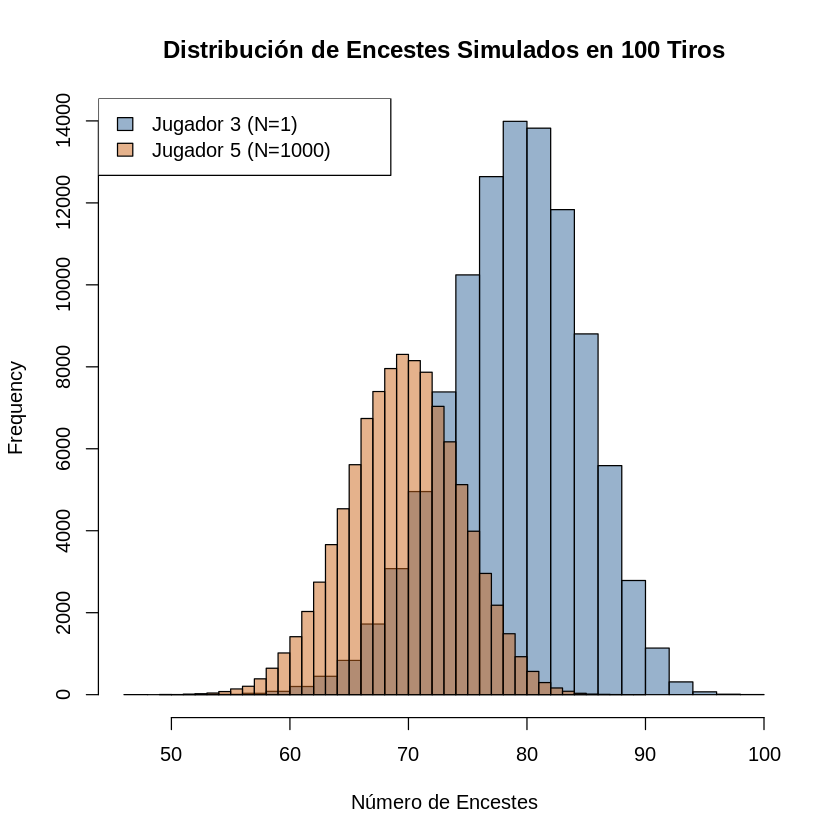

In [14]:
#--------------------------------------------------------------------------------------
# PASO 1: Definir las distribuciones de habilidad (distribuciones posteriores Beta)
#--------------------------------------------------------------------------------------

# Se utiliza un prior no informativo Beta(1,1) para todos los jugadores.
# Luego, se actualiza con los datos de encestes (k) y tiros (n).

# Jugador 1 (y 2, 3, 4 - inicialmente):
# k=80, n=100.
# La distribución posterior es Beta(alpha=1+80, beta=1+100-80)
beta_params_1_2_3_4 <- c(1 + 80, 1 + 100 - 80)
alpha_1234 <- beta_params_1_2_3_4[1]
beta_1234 <- beta_params_1_2_3_4[2]

# Jugador 5:
# k=701, n=1000.
# La distribución posterior es Beta(alpha=1+701, beta=1+1000-701)
beta_params_5 <- c(1 + 701, 1 + 1000 - 701)
alpha_5 <- beta_params_5[1]
beta_5 <- beta_params_5[2]


#--------------------------------------------------------------------------------------
# PASO 2: Simulación de Monte Carlo
#--------------------------------------------------------------------------------------

# Número de simulaciones
n_simulaciones <- 100000

# Almacenaremos los resultados de encestes simulados para cada jugador
sim_encestes_jugador_3 <- numeric(n_simulaciones)
sim_encestes_jugador_5 <- numeric(n_simulaciones)

# Simulación para el Jugador 3 (el mejor de los de índice 0.8, sin sesgo de selección)
# El for loop itera 100,000 veces para simular la ronda de 100 tiros.
for (i in 1:n_simulaciones) {
  # 1. Simular la habilidad de la jugadora: sacamos una muestra de la distribución Beta posterior.
  habilidad_simulada_3 <- rbeta(1, alpha_1234, beta_1234)

  # 2. Simular los encestes en una ronda de 100 tiros con esa habilidad.
  sim_encestes_jugador_3[i] <- rbinom(1, 100, habilidad_simulada_3)
}

# Simulación para el Jugador 5
# Repetimos el mismo proceso, pero con los parámetros de la jugadora 5.
for (i in 1:n_simulaciones) {
  habilidad_simulada_5 <- rbeta(1, alpha_5, beta_5)
  sim_encestes_jugador_5[i] <- rbinom(1, 100, habilidad_simulada_5)
}


#--------------------------------------------------------------------------------------
# PASO 3: Comparar y ordenar según la regla del problema
#--------------------------------------------------------------------------------------

# Regla: Ci < Cj si P(#Encestes Ci < #Encestes Cj | 100 tiros cada uno) > 0.5

# Comparación de Jugador 3 vs Jugador 5
# Contamos cuántas veces el Jugador 3 encestó menos que el Jugador 5.
veces_3_menos_que_5 <- sum(sim_encestes_jugador_3 < sim_encestes_jugador_5)

# Calculamos la probabilidad
prob_3_menos_que_5 <- veces_3_menos_que_5 / n_simulaciones

cat(sprintf("Probabilidad de que el Jugador 3 enceste menos que el Jugador 5: %.4f\n", prob_3_menos_que_5))
cat(sprintf("Media de encestes simulados del Jugador 3: %.2f\n", mean(sim_encestes_jugador_3)))
cat(sprintf("Media de encestes simulados del Jugador 5: %.2f\n", mean(sim_encestes_jugador_5)))
cat("--- \n")


#--------------------------------------------------------------------------------------
# Interpretación de los resultados de la simulación
#--------------------------------------------------------------------------------------

if (prob_3_menos_que_5 > 0.5) {
  cat("Según la regla de la entrenadora, el Jugador 3 es peor que el Jugador 5.\n")
  cat("Es decir, J3 < J5.\n")
} else {
  cat("Según la regla de la entrenadora, el Jugador 5 es peor que el Jugador 3.\n")
  cat("Es decir, J5 < J3.\n")
}

# Visualizar las distribuciones para una mejor comprensión
hist(sim_encestes_jugador_3, breaks = 30, col = rgb(0.2, 0.4, 0.6, 0.5),
     main = "Distribución de Encestes Simulados en 100 Tiros",
     xlab = "Número de Encestes")
hist(sim_encestes_jugador_5, breaks = 30, col = rgb(0.8, 0.4, 0.1, 0.5),
     add = TRUE)
legend("topleft", c("Jugador 3 (N=1)", "Jugador 5 (N=1000)"),
       fill = c(rgb(0.2, 0.4, 0.6, 0.5), rgb(0.8, 0.4, 0.1, 0.5)))

El resultado de la simulación nos dice que:

C3 < C5 es 0.0935

Esto significa que solo el 9.35% de las veces, el Jugador 3 encestará menos que el Jugador 5.

Por lo tanto, el 90.65% de las veces, el Jugador 3 encestará más que el Jugador 5.



---



Cada Cazatalentos presenta a la entrenadora una jugadora elegida usando los siguientes parametros:

jugadora_1 m = 100 n = 100 p = 0.8
jugadora_2 m = 200 n = 100 p = 0.8
jugadora_3 m = 1 n = 100 p = 0.8
jugadora_4 m = 2 n = 100 p = 0.8

jugadora_5 m = 1 n = 1000 (10 rondas de 100) p = 0.701 (media de todas las rondas)

Se ha comprobado que, de una muestra de jugadoras con similares caracteristicas, el riesgo de overfitting aumenta cuanto mayor es el numero de jugadoras evaluadas. Por lo tanto, la jugadora_3 al no haber sido seleccionada de un grupo, tiene la estimación más confiable entre las jugadoras con un índice de 0.8. Por otra parte, la jugadora_2 elegida de un grupo de 200, es la menos confiable.

A partir de los ejemplos planteados en esta práctica de "Cazatalentos" aprendimos que la clave para combatir el overfitting es la validación con múltiples pruebas. El índice de acierto de 0.701 de la jugadora 5 (que ha realizado 10 rondas) es el que presenta menor incertidumbre y, por lo tanto, el de menor overfitting. Sin embargo, el resultado de la simulacion de Monte Carlo (sugerida por la IA) concluye que el 90.65% de las veces, la jugadora_3 encestará más que la jugadora_5.


Por lo tanto, la conclusión final, basada en la regla de ordenamiento (Ci < Cj si prob( #Encestes Ci < #Encestes Cj | 100 tiros cada uno, siendo Ck la cazatalentos de la jugadora_k > 0.5, ) y de acuerdo a la magnitud del sesgo de seleccion, se ha arrivado al siguiente ordenamiento C3 > C4 > C1 > C2 > C5

C3 encesta más que el resto porque su rendimiento no tiene sesgo de selección y su habilidad estimada es la más alta.

C4, C2, C1 son jugadoras con la misma estimación puntual de habilidad que C3 pero se ordenan de acuerdo al sesgo de selección.

C5 encesta consistentemente menos que las demás, aunque la certeza de su estimación es la más alta de todas.